In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pybaseball as pb
from datetime import datetime, timedelta

yesterday = (datetime.now() - timedelta(1)).strftime('%Y-%m-%d')
%matplotlib inline
%reload_ext autoreload
%autoreload 2
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')
sns.set_style("ticks")

Gathering Player Data


C:\Users\ifrit\miniconda3\envs\spyderenv\lib\site-packages\pybaseball\utils.py:224: DtypeWarning: Columns (0,43,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(data.text))


['CH', 'UN', 'FS', 'SC', 'PO', 'CS', 'FO', 'EP', 'KN', 'CU', 'FA', 'KC', 'FC', 'SI', 'FF', 'SL', 'IN']


Text(0.95, 0.95, 'Miguel Cabrera\nPitches Seen: 44501\nPitches Homered: 563\nHR%: 0.0127')

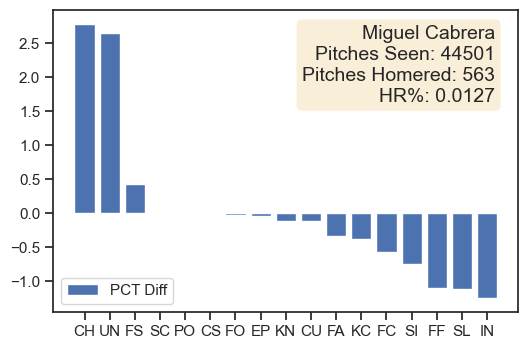

In [21]:
player_first_name = 'miguel'
player_surname = 'cabrera'

# getting the player's ID
player_id = pb.playerid_lookup(player_surname,player_first_name).key_mlbam[0]
player_played_first = int(pb.playerid_lookup(player_surname,player_first_name).mlb_played_first[0])
player_played_last = pb.playerid_lookup(player_surname,player_first_name).mlb_played_last[0]

# getting information from a player
player_statcast = pb.statcast_batter(start_dt=f'{player_played_first}-01-01', end_dt=str(yesterday), player_id=player_id)
player_statcast.pitch_type = polar_statcast.pitch_type.fillna('UN')
# extracting pitches he has homered
player_hr = player_statcast.loc[player_statcast['events'] == 'home_run']

#making a list of pitches per type bot thrown and homered
player_pitchtype_all = dict(player_statcast['pitch_type'].value_counts())
player_pitchtype_hr = dict(player_hr['pitch_type'].value_counts())

# initialize variables and aux dictionaries

total_all = 0
total_hr = 0
all_pct = {}
hr_pct = {}

# convert the stats to percentage by first adding all events and then dividing each one by the total

for key in player_pitchtype_all.keys():
    total_all = total_all + player_pitchtype_all[key]
for key in player_pitchtype_hr.keys():
    total_hr = total_hr + player_pitchtype_hr[key]    
for key in player_pitchtype_all.keys():
    all_pct[key]=100*player_pitchtype_all[key]/total_all
for key in player_pitchtype_hr.keys():
    hr_pct[key]=100*player_pitchtype_hr[key]/total_hr
    
# calculating the percentage difference between pitches thrown and pitches homered

    pct_diff = {}
for key in all_pct.keys():
    if key in hr_pct.keys():
        pct_diff[key] = hr_pct[key]-all_pct[key]
    else:
        pct_diff[key]= -all_pct[key]

# sorting the results
        
srtd_pct_diff = {}
srtd_keys = sorted(pct_diff, key=pct_diff.get, reverse=True)
print(srtd_keys)
for w in srtd_keys:
    srtd_pct_diff[w] = pct_diff[w]
    
# plotting results

pitches = srtd_pct_diff.keys()
values = srtd_pct_diff.values()

legend = list(pitches)
fig, ax = plt.subplots()
ax.bar(pitches, values, label='PCT Diff')
ax.legend(loc='lower left')

textstr = '\n'.join([f'{player_first_name} {player_surname}'.title(), f'Pitches Seen: {total_all}', f'Pitches Homered: {total_hr}', f'HR%: {total_hr/total_all:.4f}'])

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        va='top', ha='right', bbox=props)


In [19]:
player_hr.game_date.value_counts()

2010-05-28    3
2013-05-19    3
2009-04-08    2
2005-07-19    2
2004-04-13    2
             ..
2003-06-20    1
2003-07-05    1
2003-07-24    1
2003-07-28    1
2021-03-20    1
Name: game_date, Length: 514, dtype: int64

In [ ]:
player_statcast